# Gradient Descent

Gradient Descent is an algorithm for solving unconstrainted optimization problem of the form

$$\text{min}_{\mathbf{x} \in \mathbb{R}^n} f(\mathbf{x})$$


# Descent Direction

Suppose $f: \mathbb{R}^n \rightarrow \mathbb{R}$. A descent direction is a vector $\mathbf{p}$ for which there exist a positive $\hat{\alpha}$ such that $f(\mathbf{x}+\alpha \mathbf{p}) < f(\mathbf{x}) $ for all $\alpha \in (0,\hat{\alpha})$

A direction of descent satisfies following inequality:
$$\nabla f(\mathbf{x})^T \mathbf{p} < 0 $$

_Proof for scalar functions_:

Assume $f: \mathbb{R} \mapsto \mathbb{R}$ is continuous, $f'$ is continuous, $f'(x)p<0$. 
Since $f'$ is continuous, there exist a $\delta>0$ such that $f'(x+\alpha p)p < 0$ for $0<\alpha<\delta$.
By mean value theorem:
    $$f'(x+t\alpha p)=\frac{f(x+\alpha p)-f(x)}{\alpha p}<0$$
where $t \in (0,1)$. Since $0<t\alpha<\alpha<\delta$, it follows that $f(x+\alpha p) < f(x)$

Also from the proof above, one can see why $\nabla f(\mathbf{x}) \mathbf{p} $ is a measure of the rate of change due to the mean value theorem.

# Gradient Descent Algorithm

A natural choice for a search direction could the direction that minimizes:
$$\text{min}_{||p||_2 = \delta} \nabla f(x)^T \mathbf{p}, \quad \delta > 0$$
which results in following direction:
$$ p^\star = -\delta \frac{\nabla f(x)}{||\nabla f(x)||_2} $$

which can be interpeted as the direction of greatest descent for $f$.

$p^\star$ provides a notion of a direction; however, it does not provide a notion of size size $\alpha$ along direction $p^\star$.

##### Gradient Descent Algorithm
**given** a guess $\mathbf{x}$

**repeat**

   1. $p \gets \nabla -f(x)$
   2. Line Search: find $t$ such that $f(\mathbf{x})<f(\mathbf{x}+t\mathbf{p})$
   3. $\mathbf{x} \gets \mathbf{x}+t\mathbf{p}$
    
**until** stopping condition met 

Typical stopping condition are
    
  $||\nabla f(x)||_2 < \varepsilon$

#### Exact Line Search

Exact Line Search attempts to find the magnitude of the step size that minimizes $f$ along the direction $-\nabla f(x)$

$$ t = \text{argmin}_{s\ge 0} f(\mathbf{x}-s\nabla f(\mathbf{x})) $$

The problem with this approach is its inefficiency since solving the optimization problem above can be costly. For quadratic objective function such as 
$$f(\mathbf{x})=\mathbf{x}^T\mathbf{H} \mathbf{x} + \mathbf{g}^{T}\mathbf{x}+ \mathbf{c} $$
a closed form solution can be found:
$$ t= \frac{\nabla f(x)^T \nabla f(x)}{\nabla f(x)^T \mathbf{H} \nabla f(x)} $$

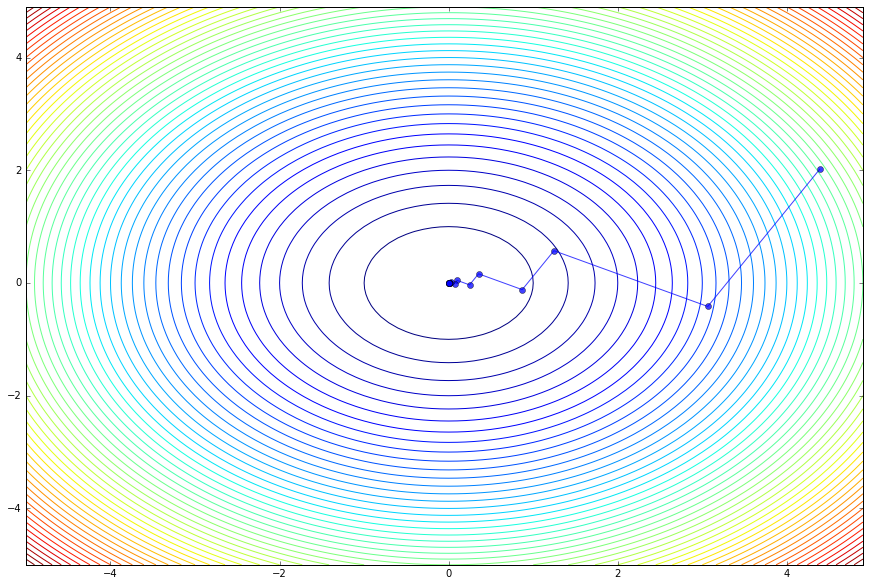

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n=np.arange(-5,5,.1)
X,Y=np.meshgrid(n,n)
F=2*X**2+2*Y**2

x=np.random.randn(2,1)+5*np.random.rand(2,1)
A=np.array([[.5,0],[0,2]])
g=A.dot(x)
norm_g=g.T.dot(g)

path=[x.copy()]
tol=1e-9
t=1

while norm_g>tol:
    eta=(g.T.dot(g)/(g.T.dot(A.dot(g))))
    x-=g*eta
    g=A.dot(x)
    norm_g=g.T.dot(g)
    path.append(x.copy())
    t+=1
    if t==1e4:
        break
        
path=np.array(path)


plt.figure(figsize=(15,10))
plt.contour(X,Y,F,50)
plt.plot(path[:,0],path[:,1],'-o',alpha=.75)
plt.show()